# 📈 **Previsão de Fechamentos das Ações Empresa**

## **Objetivo do Projeto**

Este projeto tem como objetivo analisar os dados históricos das ações da **`Uber`**, aplicando técnicas de ciência de dados e machine learning para extrair insights valiosos. Além da EDA (Análise Exploratória) o projeto inclui a construção de um dashboard para visualização dos resultados e a criação de uma pipeline automatizado para processamento dos dados.

## 1. Instalação das Bibliotecas

* Realização da ação de importação de determinadas bibliotecas da linguagem Python, trazendo diversos benefícios para o projeto. Dentre eles:

    * Melhora na eficiência e na qualidade do código.
    * Economizando tempo.
    * Permitem alterações no código a realização de determinadas ações de forma modular.

In [ ]:
"""
Objetivo: O código abaixo importa as bibliotecas do Python necessárias para análise de dados, 
visualização e modelagem do modelo de machine learning.

Bibliotecas Importadas:
    * PANDAS: Para manipulação e análise de dados tabulares.
    * NUMPY: Operações matemáticas e arrays multidimensionais.
    * SEABORN: Visualizações estatísticas avançadas.
    * MATPLOTLIB: Importada para realizarmos visualizações e gráficos focado em dados.
    * SKLEARN: Útil para Machine Learning e modelagem do modelo com métodos que facilita o desenvolvimento.
"""
#==========================================================================================================================

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## 2. Coleta de Dados

* Utilizamos um arquivo em CSV que contém informações históricas das ações da empresa UBER.

    * **Período Histórico da Base:** Dados de 2019 até 2025

    * **Nível de Granularidade:**  O nível de granularidade é Mensal. Desta forma, permite análises detalhadas das tendências ao longo do tempo, variações sazonais e crescimento mensal.

In [ ]:
"""
Objetivo: O código abaixo realiza a captura e leitura de um arquivo CSV e um 
processo de validação verificando o nome das colunas para verificar se a importação 
foi bem sucedida.

1. Lê o arquivo CSV usando o método de pd.read_csv(), armazenando os dados coletados em um Data Frame do Python.

2. Usando a sintaxe de nome_arquivo.columns, conseguimos verificar os nomes das colunas fazendo um processe de validação.
    *  A exibição dos nomes das colunas permite verificar se o arquivo CSV foi importado corretamente e 
       se as colunas estão nomeadas como esperado
"""
#==========================================================================================================================

# Lendo o arquivo CSV (Base_Acoes_Uber.csv)
Base_Acoes_Uber = pd.read_csv(r'C:\Users\jmend\OneDrive\Documentos\Projetos\Uber Analysis\Base de Dados\uber_stock_data.csv')

# Um processo de validação na qual exibo os nomes das colunas do Data Frame para verificar se a importação do conjunto de dados deu certo.
Base_Acoes_Uber.columns

Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

### 2.1 Organização do Conjunto de Dados

* **Objetivo:** Deixar o conjunto de dados mais estruturado e compreender quais são as principais features e como devemos utilizar elas no projeto.

* **Ações Realizadas:**
    * Renomear nomes das colunas;
    * Alterar ordenação das colunas;
    * Descrição de cada feature;

In [ ]:
"""
Objetivo: O código abaixo nós ajuda a organizar melhor nosso conjunto de dados, fazendo com que ele fique mais estruturado 
e melhor compreendido. Neste sentido, a primeira etapa é renomeando os nomes das colunas.

1. Criação da variável Colunas_Renomeadas, na qual ela armazena uma lista que tem os novos nomes das colunas da base de dados
que está sendo trabalhada.

2. Atribuição da lista com os novos nomes ao conjunto de dados.

3. Usando a sintaxe de nome_arquivo.info, capturamos informações do data frame como os nomes das colunas e seus respectivos 
tipos de dados.
"""
#==========================================================================================================================

# Determinação dos novos nomes das colunas
Colunas_Renomeadas = ['Data_Negociacao', 'Preco_Ajustado_Fechamento', 'Preco_Fechamento', 'Maior_Preco_Dia', 'Menor_Preco_Dia',
           'Preco_Abertura', 'Volume_Negociacoes']

# --> Atribui os novos nomes de colunas ao conjunto de dados
Base_Acoes_Uber.columns = Colunas_Renomeadas

# --> Capturo informações atualizadas dos dados
Base_Acoes_Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data_Negociacao            1444 non-null   object 
 1   Preco_Ajustado_Fechamento  1444 non-null   float64
 2   Preco_Fechamento           1444 non-null   float64
 3   Maior_Preco_Dia            1444 non-null   float64
 4   Menor_Preco_Dia            1444 non-null   float64
 5   Preco_Abertura             1444 non-null   float64
 6   Volume_Negociacoes         1444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


In [ ]:
"""
Objetivo: Organiza as colunas de um DataFrame pandas, definindo uma nova ordem para as 
colunas e exibindo um DataFrame resultante.

1. Define uma lista denominada como "nova_ordem" que contém, os nomes das colunas na ordem desejada.

2. Utiliza o comando reindex() para organizar as colunas de acordo com a ordem definida na lista.
"nova_ordem".

3. Imprime o novo Data Frame com as colunas reorganizadas corretamente

Essa organização das features é útil para facilitar a análise dos dados e melhorar a legibilidade dos
dados que estão sendo trabalhados
"""
#==========================================================================================================================

# Nova ordem das colunas
nova_ordem = ['Data_Negociacao', 'Preco_Abertura', 'Preco_Fechamento', 'Preco_Ajustado_Fechamento', 'Maior_Preco_Dia', 'Menor_Preco_Dia', 'Volume_Negociacoes']

# Reordenar o DataFrame
Base_Acoes_Uber = Base_Acoes_Uber.reindex(columns=nova_ordem)

print(Base_Acoes_Uber)

     Data_Negociacao  Preco_Abertura  Preco_Fechamento  \
0         2019-05-10       42.000000         41.570000   
1         2019-05-13       38.790001         37.099998   
2         2019-05-14       38.310001         39.959999   
3         2019-05-15       39.369999         41.290001   
4         2019-05-16       41.480000         43.000000   
...              ...             ...               ...   
1439      2025-01-30       63.419998         66.589996   
1440      2025-01-31       67.089996         66.849998   
1441      2025-02-03       65.300003         67.290001   
1442      2025-02-04       67.690002         69.750000   
1443      2025-02-05       66.500000         64.480003   

      Preco_Ajustado_Fechamento  Maior_Preco_Dia  Menor_Preco_Dia  \
0                     41.570000        45.000000        41.060001   
1                     37.099998        39.240002        36.080002   
2                     39.959999        39.959999        36.849998   
3                     41.29

### 2.2 Descrição do Conjunto de Dados

* **Quantidade de Features:** 7


    * `Data_Negociacao` = Data da negociação das ações da Uber. Indica o dia específico em que os preços e volumes foram registrados.

    * `Preco_Abertura` = Preço de abertura da ação no inicio do dia. Esse valor representa o primeiro preço negociado na data correspondente.

    * `Preco_Fechamento`  = Preço de fechamento da ação no final do dia. Esse é um valor de referência importante para investidores e análises de mercado. 

    * `Preco_Ajustado_Fechamento` = Preço de fechamento ajustado, que leva em conta eventos como desdobramento de ações e pagamentos de dividendos. Esse valor é usado para análises de longo prazo

    * `Maior_Preco_Dia` = Maior preço alcançado pela ação ao longo do pregão. Indica o valor máximo negociado no dia.

    * `Menor_Preco_Dia` = Indica o valor mínimo negociado no dia.

    * `Volume_Negociacoes` = Quantidade total de ações da Uber negociadas no dia. Um alto volume pode indicar maior interesse dos investidores no ativo.


## 3. Validação da Base de Dados 

📌 **Objetivo**

Realização de  determinadas validações para conseguirmos compreender como está a distribuição dos dados dentro da base. Certamente, essa etapa auxilia no entendimento de que técnicas de pré - processamentos podemos aplicar e por qual caminhao as nossas análises tendem a ir a partir dessas validações.

#

📊 **Ações Realizadas**

* Identificação de valores nulos:
    * Não há presença de valores nulos na base, isso demonstra que temos um nível de detalhe interessante nos dados e que podemos diminuir esforços no tratamento de dados missing e com isso podemos focar em outras soluções e tratativas que realmente são necessárias.

* Identificação de valores duplicados:
    * Não há presença de valores duplicados. Desta forma não será necessário realizar a remoção/trativas desses valores.
 
* Conversão do tipo de dado da coluna Data_Negociacao (string para datetime)
    * Certamente, esse tipo de conversão é essencial para realizar análises temporais e identificar tendências nos dados.
    
* Identificar valores discrepantes (Outliers) no conjunto de dados, utilizando gráfico Box Plot para cada feature.
    * Box Plots são úteis para identificarmos a distribuição e a presença de outliers nos dados em cada coluna. Neste sentido, foi identificado que pela diferença gritante entre as escalas dos preços e volumes será necessário realizar uma normalização nos dados para que futuramente possamos ter melhores análises.  

#




### 3.1 Identificação de valores nulos

In [ ]:
"""
Objetivo: Identificar a quantidade de valores nulos presentes em todas as features

Neste sentido, tudo aquilo que for considerado como nulo (isnull) ele vai somar 
quantas vezes aparece e demonstrar esse valor encontrado.

"""
#==========================================================================================================================

# Realizando a soma dos valores nulos presentes na base.
Base_Acoes_Uber.isnull().sum()

Data_Negociacao              0
Preco_Abertura               0
Preco_Fechamento             0
Preco_Ajustado_Fechamento    0
Maior_Preco_Dia              0
Menor_Preco_Dia              0
Volume_Negociacoes           0
dtype: int64

### 3.2 Identificando valores duplicados

In [ ]:
"""
Objetivo: Identificar a quantidade de valores duplicados presentes em toda a base.

Certamente, valores duplicados são aqueles que aparecem +1 vez na base de dados, 
seguindo a mesma lógica da validação anterior ele vai somar quantas vezes valores 
duplicados aparecem e demonstrar o resultado encontrado.

"""
#==========================================================================================================================

# Realizando a soma dos valores duplicados presentes na base. 
Base_Acoes_Uber.duplicated().sum()

0

In [ ]:
"""
Usando a sintaxe de nome_arquivo.info, capturamos informações do data frame como os nomes das colunas e seus respectivos 
tipos de dados.

"""
#==========================================================================================================================

# Capturamos informações referente as colunas, como Nome ID, Nome e o Tipo de Dado.
Base_Acoes_Uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data_Negociacao            1444 non-null   object 
 1   Preco_Abertura             1444 non-null   float64
 2   Preco_Fechamento           1444 non-null   float64
 3   Preco_Ajustado_Fechamento  1444 non-null   float64
 4   Maior_Preco_Dia            1444 non-null   float64
 5   Menor_Preco_Dia            1444 non-null   float64
 6   Volume_Negociacoes         1444 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 79.1+ KB


### 3.3 Conversão do Tipo de Dado (String - DateTime)

In [ ]:
"""
Objetivo: Este código converte a coluna 'Data_Negociacao' do tipo string (Object) para o 
tipo DateTime. Desta forma, permitindo que conseguimos realizar operações de Data e Hora 
nos dados.

1. Utilizando to_datetime() ele realiza a conversão.

2. Valida se a conversão foi bem sucedida com o info().

Certamente, esse tipo de conversão é essencial para realizar análises temporais e identificar 
tendências nos dados.
"""
#==========================================================================================================================

# Converter DATA_NEGOCIACAO de String para Datetime
Base_Acoes_Uber['Data_Negociacao'] = pd.to_datetime(Base_Acoes_Uber['Data_Negociacao']) 

Base_Acoes_Uber.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444 entries, 0 to 1443
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Data_Negociacao            1444 non-null   datetime64[ns]
 1   Preco_Abertura             1444 non-null   float64       
 2   Preco_Fechamento           1444 non-null   float64       
 3   Preco_Ajustado_Fechamento  1444 non-null   float64       
 4   Maior_Preco_Dia            1444 non-null   float64       
 5   Menor_Preco_Dia            1444 non-null   float64       
 6   Volume_Negociacoes         1444 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 79.1 KB


### 3.4 Identificar a presença de outliers nas features

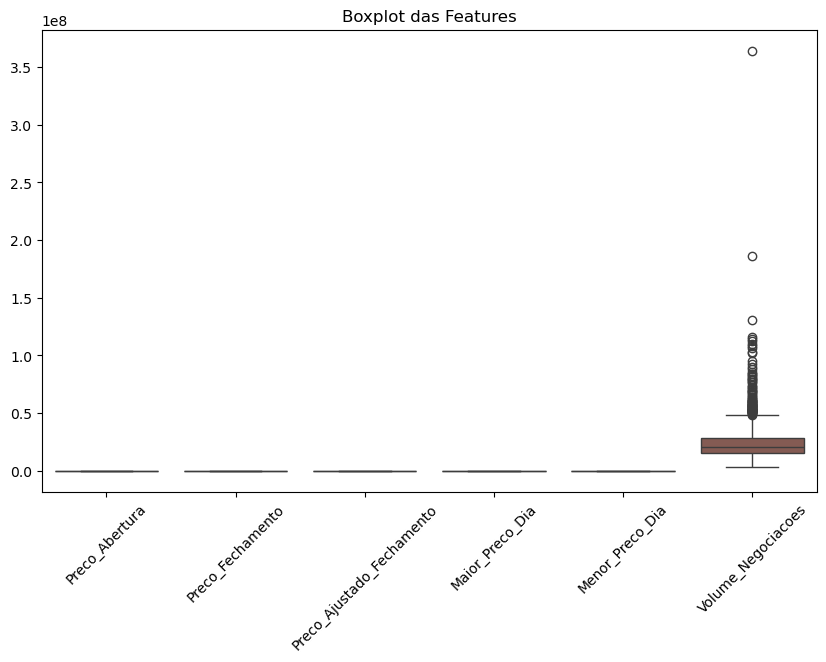

In [ ]:
"""
Objetivo: Criar box plots para podermos visualizar a distribuição dos dados nas colunas numéricas da base. São elas:

* Preco_Abertura;    
* Preco_Fechamento;
* Preco_Ajustado_Fechamento;
* Maior_Preco_Dia;
* Menor_Preco_Dia;
* Volume_Negociacoes;

1. Configura a largura e altura da figura para o gráfico usando plt.figure(figsize=())

2. Cria os box plots para todas as colunas que são numéricas usando sns.boxplot()

3. Para melhor legibilidade coloca o eixo x em 45 graus usando xticks(rotation=45)

4. Adiciona um título ao gráfico usando plt.titl

5. Exibe o gráfico

Box Plots são úteis para identificarmos a distribuição e a presença de outliers nos dados em cada coluna.
"""
#==========================================================================================================================

# Configurar tamanho da figura
plt.figure(figsize=(10, 6))

# Criar box plots para todas as colunas numéricas
sns.boxplot(data=Base_Acoes_Uber)

# Exibir gráfico
plt.xticks(rotation=45)
plt.title("Boxplot das Features")
plt.show()


## 4. Pré - Processamento

📌 **Objetivo**

As técnicas de pré processamento são extremamentes importantes para que posso realizar a tratativa da base deixando ela mais limpa e eficiente para as futura análises e modelagem do modelo de machine learning.

#

📊 **Ações Realizadas**

* Normalização e Tratativa dos Outliers:
    * Criação de uma nova coluna "Volume_Negociacoes" nela está armazenada os valores transformados e normalizados. Na qual. foi aplicada uma transformação logaritimica sendo util para melhor a distribuição 
    e robustez dos dados

* Ordenação de Valores por Data:
    * Para conseguirmos realizarmos as análises temporais e sazonais, devemos realizar a ordenação dos valores de forma crescente e pela coluna de Data_Negociação. Com isso, conseguimos ter um melhor entendimento
    dos comportamentos, padrões e evolução dos dados ao longo do tempo.
 



### 4.1 Tratamento Outliers (Processo de Normalização)

In [ ]:
"""
Objetivo: Aplica uma transformação logarítimica na coluna de "Volume Negociacoes". Desta forma, criamos  uma nova coluna "Volume_Negociacoes_Proc" 
com os valores transformados e normalizados.

1. Aplica a função np.log1p() à coluna "coluna negociacoes

2. Armazena os valores transformados em uma nova coluna chamada como processamento.

A transformação logarítmica é útil para reduzir a assimetria nos dados que estão com a distribuição muito para direita ou esquerda. Isso melhora o 
desempenho dos modelos de machine learnig e deixa eles mais robustos e normalizados.
"""
#==========================================================================================================================

# Aplicar transformação logarítmica à coluna 'Volume_Negociacoes'
Base_Acoes_Uber["Volume_Negociacoes_Proc"] = np.log1p(Base_Acoes_Uber["Volume_Negociacoes"])


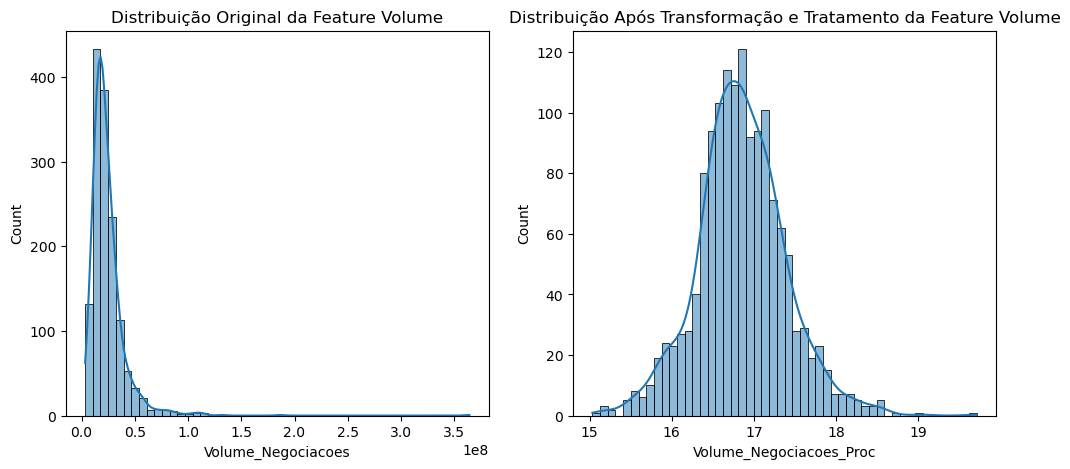

In [ ]:
"""
Este código cria dois histogramas lado a lado para comparar a distribuição da coluna 'Volume_Negociacoes' antes e depois da transformação logarítmica.

1. Configura o tamanho da figura para os gráficos usando plt.figure(figsize=(12, 5)). Isso define a largura e altura da figura em polegadas.

2. Cria o primeiro histograma usando sns.histplot() para a coluna 'Volume_Negociacoes' original. Define o número de bins como 50 e exibe a estimativa 
de densidade do kernel (KDE).

3. Define o título do primeiro histograma como "Distribuição Original da Feature Volume".

4. Cria o segundo histograma usando sns.histplot() para a coluna 'Volume_Negociacoes_Proc' (após a transformação logarítmica). Define o número de bins 
como 50 e exibe o KDE.

5. Define o título do segundo histograma como "Distribuição Após Transformação e Tratamento da Feature Volume".

6. Exibe os gráficos usando plt.show().
 
A comparação dos histogramas permite visualizar como a transformação logarítmica alterou a distribuição dos dados, tornando-a mais simétrica e
próxima de uma distribuição normal.
"""
#==========================================================================================================================


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(Base_Acoes_Uber["Volume_Negociacoes"], bins=50, kde=True)
plt.title("Distribuição Original da Feature Volume")


plt.subplot(1,2,2)
sns.histplot(Base_Acoes_Uber["Volume_Negociacoes_Proc"], bins=50, kde=True)
plt.title("Distribuição Após Transformação e Tratamento da Feature Volume")

plt.show()

### 4.2 Ordenação de Valores por Data

In [ ]:
"""
Objetivo: Ordena o DataFrame en ordem crescente com base na coluna 'Data_Negociacao'

1. Utiliza o comando .sort_values() para ordenar as linhas

2. Especifica a coluna 'Data_Negociacao' como a coluna de ordenação

3. Definição da ordem de ordenação como crescente a partir do comando ascending = True

A ordenação por data é essencial para análise de séries temporais, pois permite visualizar e analisar 
a evolução dos dados ao longo do tempo. Isso é importane para identificar tendências, padrões e 
sazonalidade nas informações.
"""
#==========================================================================================================================

Base_Acoes_Uber = Base_Acoes_Uber.sort_values(by="Data_Negociacao", ascending=True)


In [14]:
Base_Acoes_Uber = Base_Acoes_Uber.reset_index(drop=True)


## 5. Análise Exploratória de Dados (EDA)

### 5.1 Análise Univariada

📌 **Objetivo**

A análise univariada tem como objetivo entender o comportamento individual de cada variável da base de dados. Desta forma, vamos avaliar a distribuição dos preços de abertura, fechamento, preços ajustados, máximas, mínimas e volume de negociações

#

📊 **Resultados da Análise**

* Distribução dos Preços (Abertura, Fechamento, Ajustado, Máximo e Mínimo)

    * Os preços apresentam uma distribuição assímetrica à direita, indicando que há mais valores concentrados na faixa mais baixa, com alguns picos mais altos.

    * A distribuição não é normal, pois há evidências de múltiplos picos, o que pode indicar diferentes períodos de comportamento do mercado.

    * Os preços de abertura, fechamento e ajuste são muito semelhantes, o que mostra que não há grandes variações entre eles em um mesmo dia.

* Distribuição do Volume de Negociações

    * O volume de negociações tem uma distribuição mais simétrica após a transformação logarítimica aplicada.

    * Originalmente, o volume apresentava uma cauda longa à direita, indicando a presença de alguns dias com volumes extremamentes altos.

    * Após a transformação, a distribuição ficou mais próxima da normalidade, o que facilita a aplicação de modelos estatísticos.

#

✅ **Insights**

* Os preços das ações da Uber não seguem uma distribuição normal, o que sugere que podem haver padrões de sazonalizade ou momentos de volatilidade.

* O volume de negociações tinha outliers, mas a transformação logarítmica ajudou a normalizar sua distribuição.

* A multimodalidade nso preços podem indicar diferentes comportamentos no mercado de ações, como perúidos de crescimento e queda.



In [ ]:
"""
Objetivo: O código gera estatísticas descritivas da Base de Dados, afim de podermos ter uma visão clara de como está os 
dados em cada coluna.


1. Utiliza o describe() para calcular e exibir as estatísticas das colunas numéricas.

Iremos ter informações como a contagem de valores na coluna, a média, desvio padrão, valor minimo e maximo e percentis.
Podemos concluir, que elas são úteis para entendermos a distribuição dos dados em cada coluna.
"""
#==========================================================================================================================

Base_Acoes_Uber.describe()

,Data_Negociacao,Preco_Abertura,Preco_Fechamento,Preco_Ajustado_Fechamento,Maior_Preco_Dia,Menor_Preco_Dia,Volume_Negociacoes,Volume_Negociacoes_Proc
count,1444,1444.000000,1444.000000,1444.000000,1444.000000,1444.000000,1.444000e+03,1444.000000
mean,2022-03-22 02:49:31.745152256,44.493022,44.465374,44.465374,45.287511,43.643301,2.429800e+07,16.850159
min,2019-05-10 00:00:00,15.960000,14.820000,14.820000,17.799999,13.710000,3.380000e+06,15.033387
25%,2020-10-13 18:00:00,31.867499,31.930000,31.930000,32.653749,31.181250,1.498905e+07,16.522831
50%,2022-03-21 12:00:00,41.215000,41.355001,41.355001,41.910000,40.518499,2.036965e+07,16.829557
75%,2023-08-28 06:00:00,54.664999,54.719999,54.719999,55.635001,53.597502,2.843280e+07,17.163054
max,2025-02-05 00:00:00,85.639999,86.339996,86.339996,87.000000,84.180000,3.642318e+08,19.713301
std,NaN,15.643967,15.594262,15.594262,15.740825,15.482652,1.774084e+07,0.537765


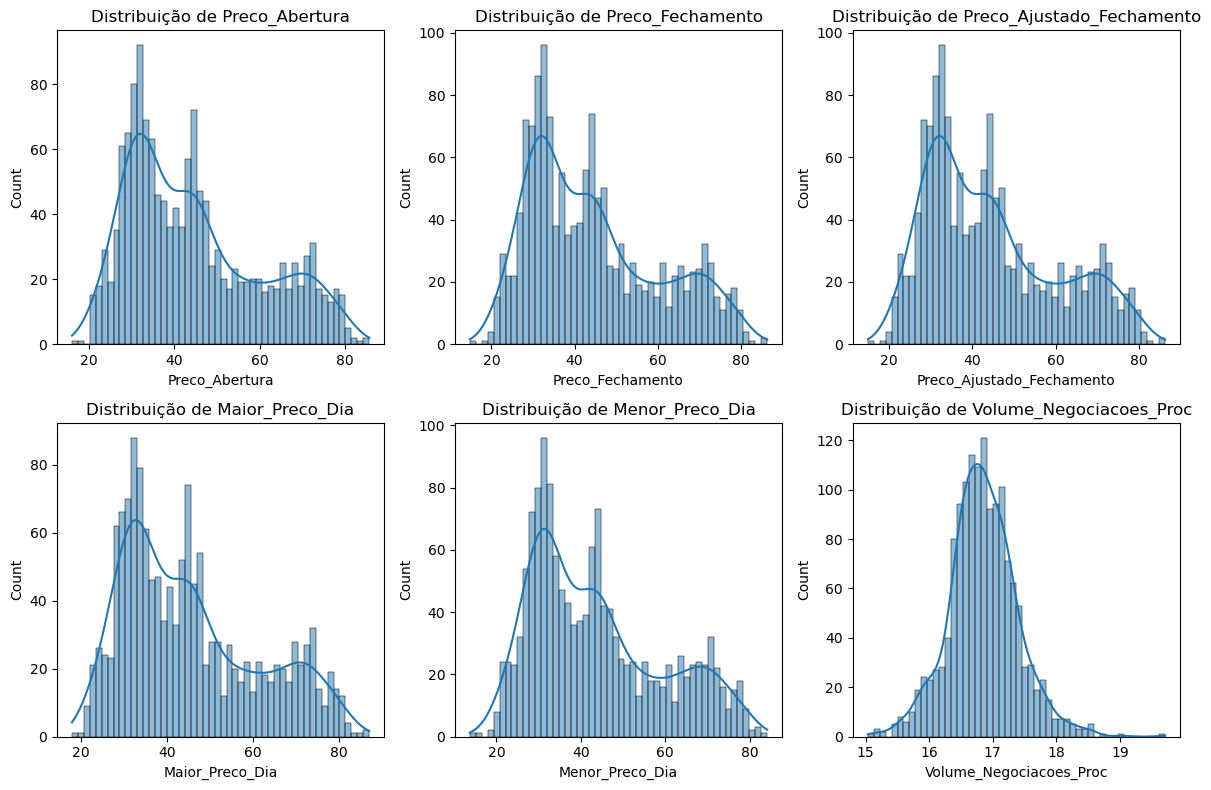

In [ ]:
"""
Objetivo: Este código cria um histograma para visualizar a distribuição das variáveis numéricas.

1. Definimos uma lista denominada como "variaveis" e nela está contendo os nomes das colunas 
numéricas que iremos utilizar no gráfico.

2. Exibe os gráficos usando plt.show()

Os histogramas permitem visualizar a distribuição de cada variável numérica,
identificar a presença de assimetria ou outliers e entender a forma geral dos dados.
"""
#==========================================================================================================================

# Definir variáveis para análise univariada.
variaveis = ["Preco_Abertura", "Preco_Fechamento", "Preco_Ajustado_Fechamento", 
             "Maior_Preco_Dia", "Menor_Preco_Dia", "Volume_Negociacoes_Proc"]

# Define a largura e altura da figura em polegadas.
plt.figure(figsize=(12, 8))

# Inicia um loop for para iterar sobre as variáveis da lista determinada.
for i, var in enumerate(variaveis, 1):

    # Cria um subplot ou grade de 2 ou 3 linhas para os gráficos.
    plt.subplot(2, 3, i)

    # Cria um histograma para a cada variável usando o sns.histplot()
    sns.histplot(Base_Acoes_Uber[var], bins=50, kde=True)

    # Determina um titulo dinamico para cada gráfico
    plt.title(f"Distribuição de {var}")

# Ajusta o layout dos subplots para evitar sobreposição usando plt.tight_layout().
plt.tight_layout()

# Exibe os gráficos 
plt.show()


### 5.2 Análise Multivariada

📌 **Objetivo**

A análise multivariada visa identificar relações entre diferentes variáveis da base de dados, ajudando a entender padrões e possíveis dependências. Para isso, utilizamos a matriz de correlação para medir o grau de associação entre as variáveis numéricas.

#

📊 **Resultados da Análise**

* Relação entre os preços

    * As features relacionadas a preços(Abertura, Fechamento, Máxima e Mínima) possuem correlações entre si. Desta forma, isso indica que essas variáveis se movem juntas, portanto se algum dos preços sobem ou descem, os outros seguem os mesmos comportamentos.

* Relação entre Volume de Negociações e Preços

    * A correlação entre os preços e os volumes das negociações é muito fraca e não é linear. Desta forma, isso indica que há outros fatores que influenciam as variações dos preços.

* Correlação entre Volume Negociado e sua Transformação

    * O volume original e sua versão transformada (Volume_Negociacoes e Volume_Negociacoes_Proc) têm correlação alta (0.84), como esperado.

    * Isso confirma que a transformação logarítmica preservou a relação geral da variável, apenas tornando sua distribuição mais normalizada.

#

✅ **Insights Importantes**

* Como os preços estão altamente correlacionados entre si, podemos escolher apenas um deles para análises futuras, evitando redudância nos modelos.

* A baixa correlação entre volume e preço podem indicar que fatores externos impactam o comportamento da ação da Uber.

* A transformação logarítmica do volume ajudou a melhorar sua relação com outras variáveis, tornando os dados mais adequados para análises estatísticas.




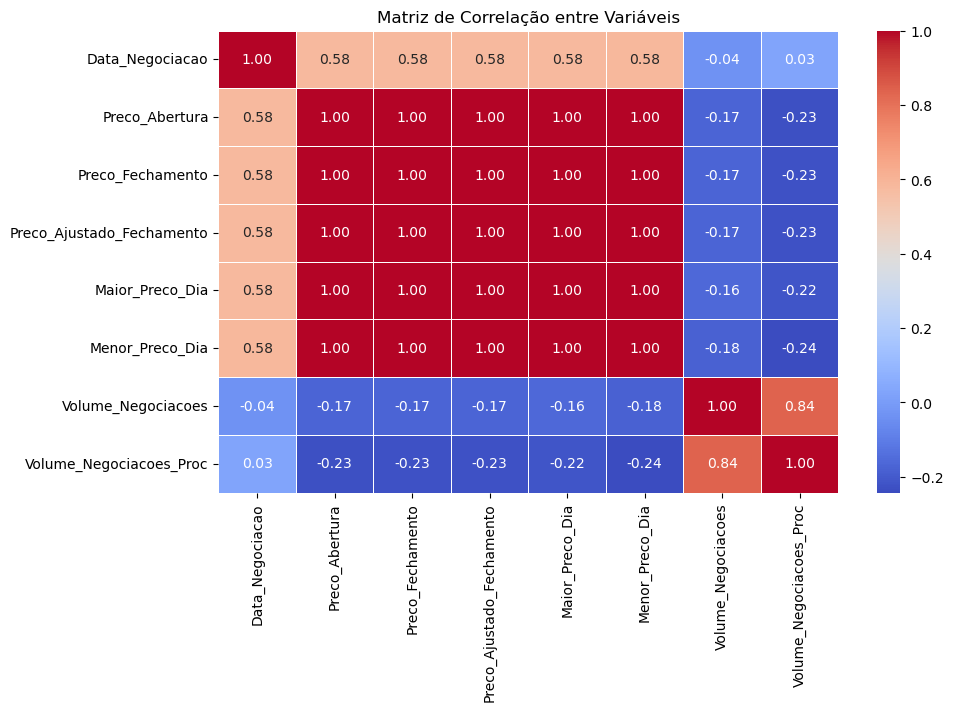

In [ ]:
"""
Objetivo: O código cria um mapa de calor (heatmap) para visualizar a matriz de correlação entre as visualizações numéricas.

O mapa de calor permite visualizar rapidamente as correlações entre as variáveis e com isso podemos entender quais delas estão
fortemente interligadas de forma positiva ou negativa. Certamente, isso é útil para seleção de features e análise exploratória 
dos dados.
"""
#==========================================================================================================================


# Isso define a largura e altura da figura em polegadas.
plt.figure(figsize=(10, 6))

# Cria o mapa de calor usando sns.heatmap().
# Calcula a matriz de correlação usando o método corr() do DataFrame Base_Acoes_Uber.
# Define annot=True para exibir os valores de correlação nas células.
# Define cmap="coolwarm" para usar um mapa de cores "coolwarm" (azul para correlações negativas, vermelho para correlações positivas).
# Define fmt=".2f" para formatar os valores de correlação com duas casas decimais.
# Define linewidths=0.5 para adicionar linhas de largura 0.5 entre as células.
sns.heatmap(Base_Acoes_Uber.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Determina um titulo para o gráfico
plt.title("Matriz de Correlação entre Variáveis")

# Exibir gráfico
plt.show()


In [ ]:
"""
Objetivo: Este código define a coluna "Data_Negociacao" como o índice da nossa base, e assim facilitando a análise de séries temporais.

Definir a coluna de data como índice é uma prática comum em análise de séries temporais, pois permite realizar operações de indexação e 
seleção com base nas datas, além de facilitar a visualização e análise da evolução dos dados ao longo do tempo.
"""
#==========================================================================================================================


# Utiliza o método set_index() do DataFrame Base_Acoes_Uber para definir o índice.
# Especifica a coluna 'Data_Negociacao' como a coluna a ser definida como índice.
# Define inplace=True para modificar o DataFrame original em vez de retornar um novo DataFrame.
Base_Acoes_Uber.set_index("Data_Negociacao", inplace=True)

### 5.3 Análise Temporal

📌 **Objetivo**

O objetivo desta análise sazonal foi identificar padrões recorrentes ao longo do tempo nos preços das ações da Uber, verificando tendências, ciclos e impactos de fatores externos nos movimentos de preços e volumes de negociações.

#

📊 **1. Análise Temporal dos Preços das Ações**

* Evolução dos Preços das Ações

    * O gráfico de linha mostra a evolução dos preços de abertura, fechamento e fechamento ajustado ao longo do tempo.

    * Entre 2019 e 2022, os preços apresentaram oscilações significativas, refletindo volatilidade e possíveis eventos macroecônomicas.

    * A partir de 2023, o preço iniciou uma trajetória de alta mais acentuada, atingindo picos em 2024.


*  Insights

    * Quedas expressivas observadas em 2020 podem estar associadas ao impacto da pandemia.

    * Forte recuperação nos preços a partir de 2023, indicando um novo ciclo de crescimento.

    * Picos de preço acompanhados por picos no volume de negociações sugerem eventos importantes.
#

---

#

📉 **2. Análise Temporal do Volume de Negociações**

* Comportamento do Volume

    * O volume de negociações variou bastante ao longo dos anos, com momentos de grande oscilação.

    * Em determinados períodos houve picos acentuados, sugerindo aumento de interesse do mercado.

* Insights

    * O maior pico no volume ocorreu no início de 2024, coincidindo com uma forte alta no preço da ação.

    * O volume parece mais instável nos momentos de maior volatilidade dos preços.

#

---

#

📈 **3. Comparação entre Preço e Volume**

* Correlação entre Volume e Preço

    * Os gráficos se sobrepõe, com isso é capaz observar que grande variações no volume geralmente precedem ou coincidem com movimentos expressivos no preço.

* Insights

    * Se temos um aumento no volume das negociações juntamente com os preços, pode indicar a entrada de grandes investidores ou notícias impactantes.

#

---

#

💹 **4.Análise de Têndencia dos Preços**

* Têndencias Encontradas

    * Entre 2019 e 2022, as ações demonstraram oscilações consideráveis, um reflexo da instabilidade do mercado e de possíveis eventos macroeconômicos impactantes.

    * A partir de 2023, observa - se uma tendência de alta mais consistente, com picos de preço em 2024, sugerindo um período de crescimento robusto.

* Insights

    * As quedas acentuadas nos preços em 2020 provavelmente coincidem com o início da pandemia de COVID - 19, que afetou dasticamente a mobilidade global e os serviços de transporte.

    * A forte recuperação a partir de 2023 indica um novo ciclo de crescimento para a Uber. Possivelmente impulsionado por fatores como a retomada da economia, a expansão dos serviços de motoristas e alta pedida por esses servços.

#

---

#

🔍 **Conclusão**

A análise sazonal revelou padrões importantes na movimentação das ações da Uber. A relação entre volume e preço indica que variações bruscas no volume podem ser preditoras de movimentos significativos nos preços. Além disso, a recuperação das ações a partir de 2023 pode estar associada a fatores econômicos ou estratégicos da empresa.


    

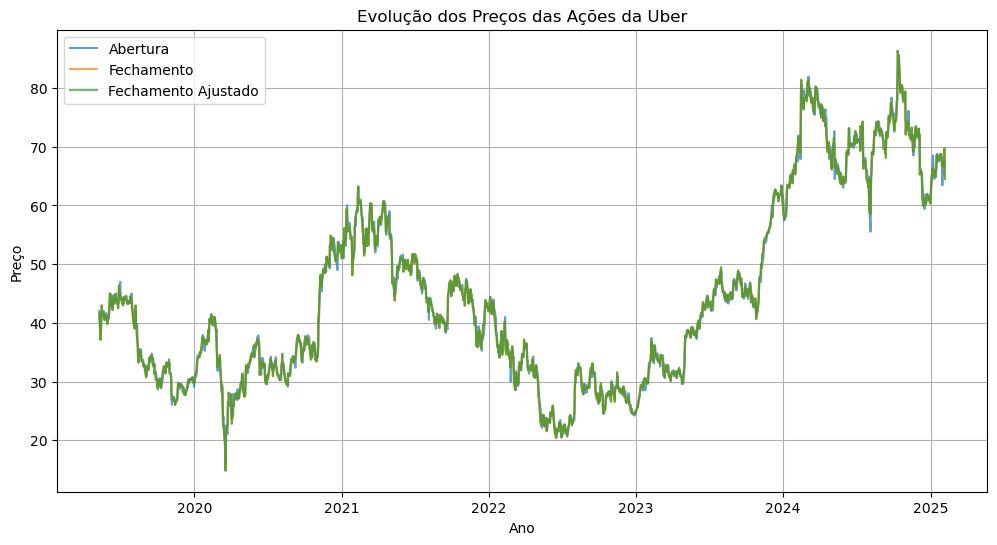

In [ ]:
"""
Objetivo: O código cria um gráfico de linhas para visualizar a evolução dos preços de abertura, fechamento e fechamento ajustado das ações da Uber ao 
longo do tempo de 2019 para 2025.

O gráfico de linhas permite visualizar a tendência e a volatilidade dos preços das ações da Uber ao longo do tempo, facilitando a 
identificação de padrões e a comparação entre os diferentes tipos de preço (abertura, fechamento e fechamento ajustado).

"""
#==========================================================================================================================

# Configura o tamanhp (altura e largura) da figura
plt.figure(figsize=(12,6))

# Cria um gráfico de linhas para Preco_Abertura
plt.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Preco_Abertura"], label="Abertura", alpha=0.7)

# Cria um gráfico de linhas para Preco_Abertura
plt.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Preco_Fechamento"], label="Fechamento", alpha=0.7)

# Cria um gráfico de linhas para Preco_Abertura
plt.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Preco_Ajustado_Fechamento"], label="Fechamento Ajustado", alpha=0.7)

# Define o rótulo do eixo x como "Ano" usando plt.xlabel().
plt.xlabel("Ano")

#zDefine o rótulo do eixo y como "Preço" usando plt.ylabel().
plt.ylabel("Preço")

# Define o título do gráfico como "Evolução dos Preços das Ações da Uber" usando plt.title().
plt.title("Evolução dos Preços das Ações da Uber")

# Adiciona uma legenda para identificar as linhas usando plt.legend().
plt.legend()

# Adiciona uma grade ao gráfico usando plt.grid(True).
plt.grid(True)

# Exibe o gráfico usando plt.show().
plt.show()

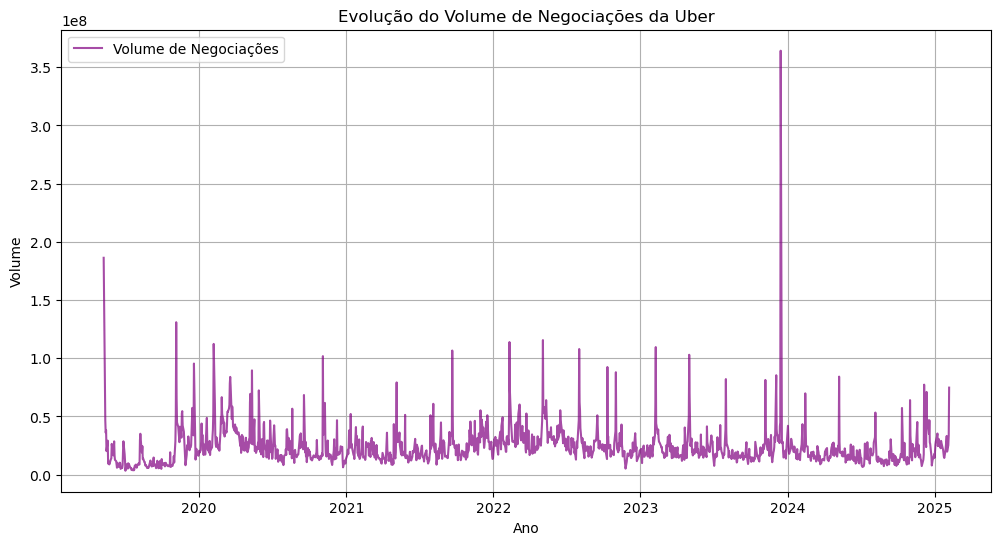

In [ ]:
"""
Objetivo: Este código cria um gráfico de linhas para visualizar a evolução do volume de negociações das ações da Uber ao 
longo do tempo.

O gráfico de linhas permite visualizar a tendência e a volatilidade do volume de negociações das ações da Uber ao longo do 
tempo, facilitando a identificação de períodos de alta e baixa atividade no mercado.
"""
#==========================================================================================================================

# Criar a figura
plt.figure(figsize=(12,6))

# Plotar o volume negociado ao longo do tempo
plt.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Volume_Negociacoes"], label="Volume de Negociações", color="purple", alpha=0.7)

# Configurações do gráfico
plt.xlabel("Ano")
plt.ylabel("Volume")
plt.title("Evolução do Volume de Negociações da Uber")
plt.legend()
plt.grid(True)
plt.show()


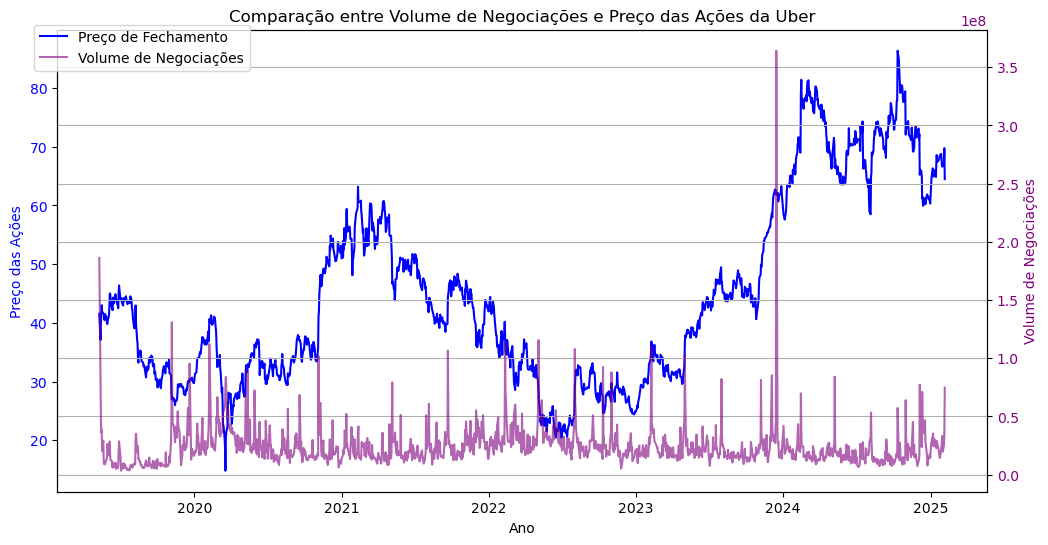

In [ ]:
"""
Objetivo: Este código cria um gráfico de linhas duplas para comparar a evolução do preço de fechamento das ações da Uber com o 
volume de negociações ao longo do tempo.

O gráfico de linhas duplas permite visualizar a relação entre o preço de fechamento  das ações e o volume de negociações ao longo 
do tempo, facilitando a identificação de possíveis correlações e padrões entre as duas variáveis.
"""
#==========================================================================================================================

# Isso define o tamanho da figura e cria um objeto de figura (fig) e um objeto de eixo (ax1).
fig, ax1 = plt.subplots(figsize=(12,6))

# Plota o preço de fechamento das ações no eixo primário (ax1) usando ax1.plot()
ax1.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Preco_Fechamento"], color='blue', label="Preço de Fechamento")
ax1.set_xlabel("Ano")
ax1.set_ylabel("Preço das Ações", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Cria o segundo eixo (ax2) compartilhado com o eixo x primário usando ax1.twinx().
ax2 = ax1.twinx()
ax2.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Volume_Negociacoes"], color='purple', alpha=0.6, label="Volume de Negociações")
ax2.set_ylabel("Volume de Negociações", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Adicionando título
plt.title("Comparação entre Volume de Negociações e Preço das Ações da Uber")

# Adicionando legenda
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

# Adicionando grade
plt.grid(True)
plt.show()


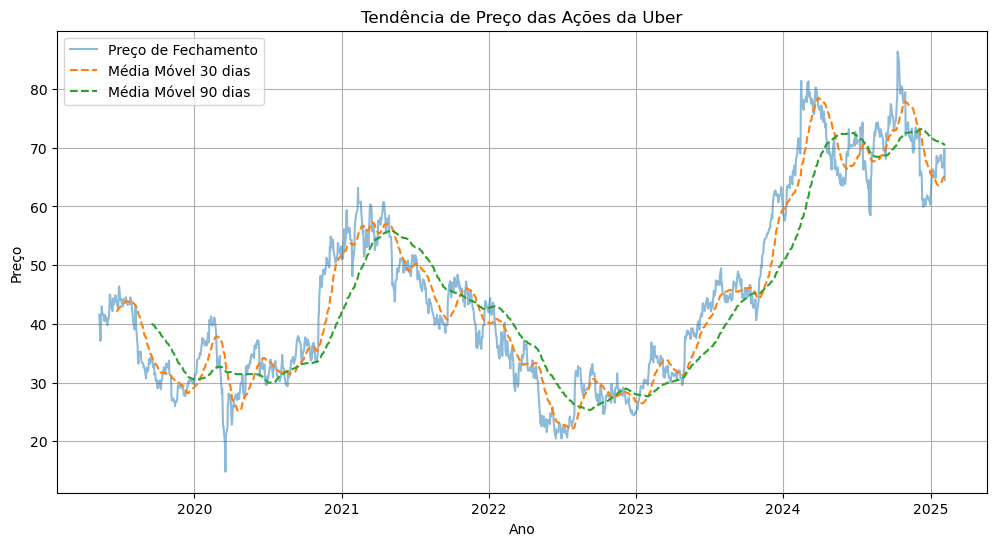

In [ ]:
"""
Este código calcula e visualizar a média de 30 e 90 dias do preço de fechamento das ações da Uber, juntamente com o preço de fechamento 
original, para analisar a tendência dos preços ao longo do tempo.


As médias móveis suavizam as flutuações de curto prazo nos preços das ações, permitindo visualizar a tendência geral dos preços ao longo 
do tempo. A comparação entre as médias móveis de 30 e 90 dias pode ajudar a identificar pontos de cruzamento que podem indicar mudanças 
na tendência dos preços.
"""
#==========================================================================================================================

# Criação das médias de 30 e 90 dias 
Base_Acoes_Uber["Media_Movel_30"] = Base_Acoes_Uber["Preco_Fechamento"].rolling(window=30).mean()
Base_Acoes_Uber["Media_Movel_90"] = Base_Acoes_Uber["Preco_Fechamento"].rolling(window=90).mean()

# Criação da figura determinando sua largura e altura
plt.figure(figsize=(12,6))

# Cria um gráfico de linhas para Preco_Fechamento
plt.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Preco_Fechamento"], label="Preço de Fechamento", alpha=0.5)

# Cria um gráfico de linhas para Media_Movel_30
plt.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Media_Movel_30"], label="Média Móvel 30 dias", linestyle="dashed")

# Cria um gráfico de linhas para Media_Movel_90
plt.plot(Base_Acoes_Uber.index, Base_Acoes_Uber["Media_Movel_90"], label="Média Móvel 90 dias", linestyle="dashed")

# Configurações dos gráficos
plt.xlabel("Ano")
plt.ylabel("Preço")
plt.title("Tendência de Preço das Ações da Uber")
plt.legend()
plt.grid(True)
plt.show()


## 5. Modelagem e Desenvolvimento do Modelo de Previsão

🎯**Objetivo da Modelagem**

Nesta etapa do projeto, o foco é construir um **modelo preditivo para estimar o preço de fechamento das ações da Uber com base em dados históricos**. O desenvolvimento seguiu uma abordagem iterativa, passando por diferentes etapas para refinar o modelo e reduzir o erro.

#

---

#

**1. Separação dos Dados de Treino e Teste**

Para garantir uma boa generalização do modelo, os dados foram dividos em:

* Treino (80%) - Usado para treinar o modelo

* Teste (20%) - Usado para avaliar o desempenho

A divisão foi feita sem embaralhar os dados, pois se trata de uma série temporal, onde a sequência dos eventos importa.

#

---

#

**2. Aplicação do Modelo de Regressão - Random Forest**

O primeiro modelo testado foi o Random Forest Regressor, um algoritmo baseado em árvores de decisão que funciona bem para previsões em dados tabulares.

Métricas (Resultados):

* MAE (Erro Médio Absoluto): 8.14

* RMSE (Raiz do Erro Quadrático Médio): 9.84

O modelo apresentou um erro significativo, indicando que havia espaço para melhoria

#

---

#

 **3. Otimização de Hiperparâmetros**

Para melhorar a performance do Random Forest, foi realizada uma otimização dos hiperparâmetros usando RandomizedSearchCV. Foram ajustados parâmetros como:

* n_estimators (número de árvores)
* max_depth (profundidade das árvores)
* min_samples_split e min_samples_leaf

Resultados após a otimização:

* MAE: 8.63 (aumento no erro)
* RMSE: 10.31 (aumento no erro)

A otimização dos hiperparâmetros não melhorou o desempenho, o que sugeriu a necessidade de criar novas features para capturar melhor os padrões dos dados.

#

---

#

**4. Engenharia de Atributos (Feature Engineering)**

Para melhorar o modelo, foram criadas novas variáveis (features) baseadas no histórico de preços e volume:

* Médias móveis (7, 30 e 90 dias) → Para capturar tendências
* Volatilidade (desvio padrão de 7 dias) → Para medir oscilações do mercado
* Retorno percentual diário → Para entender a variação diária

Com essas novas variáveis, o modelo poderia capturar melhor a tendência do mercado e prever preços com maior precisão.

#

---

#

**5.Treinamento do Modelo Random Forest com Novas Features**

Após incluir as novas features, o Random Forest foi refeito com os mesmos hiperparâmetros otimizados anteriormente.

Resultados do modelo atualizado:

* MAE: 8.10
* RMSE: 9.66

A inclusão das novas features ajudou a reduzir o erro, mostrando que a engenharia de atributos teve um impacto positivo. No entanto, o erro ainda era relativamente alto

#

---

#

**6. Desenvolvimento Modelo XGBoost**

Para comparar o desempenho, foi treinado um modelo XGBoost Regressor, um algoritmo de gradient boosting mais avançado que costuma apresentar melhores resultados em previsões complexas.

Resultados do XGBoost:

* MAE: 8.10
* RMSE: 0.55

O XGBoost reduziu drasticamente o RMSE, indicando que ele capturou melhor os padrões do mercado do que o Random Forest.

#

---

#

**7. Escolha do Melhor Modelo**

Com base nos resultados das métricas, o XGBoost foi escolhido como o modelo final para prever os preços de fechamento das ações da Uber.

Motivos para a escolha:

✅ Menor erro (RMSE = 0.55), indicando previsões mais precisas

✅ Maior capacidade de capturar padrões complexos

✅ Modelo mais robusto para séries temporais

## Modelo Random Florest Regressor

### 5.1 Separação dos Dados de Treino e Teste

In [ ]:
"""
Este código divide a base em um conjuntos de treinamento e teste para modelagem de regressão, definindo as variáveis independentes (features) 
e a variável alvo (target).

A divisão dos dados em conjuntos de treinamento e teste é essencial para avaliar o desempenho de modelos de machine learning. O conjunto de 
treinamento é usado para treinar o modelo, enquanto o conjunto de teste é usado para avaliar o desempenho do modelo em dados não vistos.
"""
#==========================================================================================================================


# Importa a função train_test_split da biblioteca sklearn.model_selection
from sklearn.model_selection import train_test_split

# Define a lista 'features' contendo os nomes das colunas que serão usadas como variáveis independentes (independentes)
features = ["Preco_Abertura", "Maior_Preco_Dia", "Menor_Preco_Dia", "Volume_Negociacoes_Proc"]

# Define a variável que vai ser usada como alvo
target = ["Preco_Fechamento"]

# Divide os dados em conjuntos de treinamento e teste usando a função train_test_split().
X_train, X_test, y_train, y_test = train_test_split(
    # Define o tamanho do conjunto de teste como 20% do total de dados usando test_size=0.2.
    # Define a semente aleatória como 42 usando random_state=42 para garantir a reprodutibilidade da divisão.
    Base_Acoes_Uber[features], Base_Acoes_Uber[target], test_size=0.2, random_state=42, shuffle=False
)

# Exibição dos resultados da quantidade de valores do conjunto de treino e teste
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 1155 amostras
Tamanho do conjunto de teste: 289 amostras


#### 5.2 Aplicação do Modelo de Regressão Random Florest 

In [24]:
"""
Este código treina um modelo de regressão RandomForestRegressor para prever o preço de fechamento das ações da Uber,
avalia o desempenho do modelo usando MAE e RMSE e exibe os resultados.

O modelo RandomForestRegressor é um algoritmo de aprendizado de máquina supervisionado que usa várias árvores de decisão 
para fazer previsões. O MAE e o RMSE são métricas comuns para avaliar o desempenho de modelos de regressão, com valores 
menores indicando um melhor desempenho.
"""

# Importação do RandomForestRegressor para criação do modelo de Regressão
from sklearn.ensemble import RandomForestRegressor

# Importação do sklearn metrics para a conseguir realizar a avaliação do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Treinando o modelo com ajuste de pesos
modelo = RandomForestRegressor(n_estimators= 100, random_state=42)

# Utilizando o conjunto de dados de treino
modelo.fit(X_train, y_train)

# Realizando predição com os dados de teste
y_pred = modelo.predict(X_test)

# Avaliação dos resultados que o modelo gerou
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

c:\Users\jmend\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE: 8.14
RMSE: 9.84


c:\Users\jmend\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### 5.3 Otimização de Hiperparâmetros para melhorar performance do modelo

In [25]:
"""
Objetivo: Aqui o intuito é otimizar o modelo criado utilizando RandomizedSearchCV e depois avaliar o 
desempenho do modelo otimizado usando MAE e RMSE.

O RandomizedSearchCV permite encontrar os melhores hiperparâmetros para um modelo
de machine learning, melhorando seu desempenho.
"""

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Definição dos hiperparâmetros para que podemos utilizar no modelo
param_rf = {
    "n_estimators": [50, 100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

# Criando o modelo novamente
rf_model = RandomForestRegressor(random_state=42)

# Cria uma instância do otimizador RandomizedSearchCV com os seguintes parâmetros
rf_search = RandomizedSearchCV(
    # Estimator: O modelo Base (rf_model)
    estimator=rf_model,

    # param_distributions: o dicionário de hiperparâmetros (param_rf).
    param_distributions=param_rf,

    # Número de combinações testadas
    n_iter=20,

    # Validação cruzada
    cv=5,  

    # scoring: a métrica de avaliação a ser usada (neg_mean_absolute_error).
    scoring="neg_mean_absolute_error",

    # verbose: controla a verbosidade da saída (1).
    verbose=1,

    # random_state: a semente aleatória para reprodutibilidade (42).
    random_state=42,

    # n_jobs: o número de trabalhos paralelos a serem executados (-1 para usar todos os núcleos).
    n_jobs=-1
)

# Ajustando o modelo com os melhores hiperparâmetros que o otimizador determinar
print("🔍 Otimizando Random Forest...")
rf_search.fit(X_train, y_train)

# Pegando o melhores dados encontrados
best_rf = rf_search.best_estimator_

# Fazendo previsões
y_pred_rf = best_rf.predict(X_test)

# Avaliação do modelo
print("\n📊 **Resultados - Random Forest**")
print(f"Melhores parâmetros: {rf_search.best_params_}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf)):.2f}")



🔍 Otimizando Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\jmend\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



📊 **Resultados - Random Forest**
Melhores parâmetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 30, 'bootstrap': True}
MAE: 8.63
RMSE: 10.31


#### 5.4 Engenharia de Atributos: Criando novas features pra melhorar a performance do modelo

In [26]:
"""
Objetivo: Cria novas colunas para a base, incluindo média móvel, volatilidade e retorno percentual e remove valores nulos 

A criação de novas features como média móvel, volatilidade e retorno percentual pode fornecer informações adicionais sobre 
a dinâmica dos preços das ações, facilitando a análise de tendências, padrões e riscos. A remoção de valores nulos é 
importante para garantir a integridade dos dados e evitar erros em análises subsequentes ou modelos de machine learning.
"""

# Criação de feature com a média de 7 dias referente preço do fechamento
Base_Acoes_Uber["Media_Movel_7"] = Base_Acoes_Uber["Preco_Fechamento"].rolling(window=7).mean()

# Criar volatilidade (desvio padrão dos últimos 7 dias)
Base_Acoes_Uber["Volatilidade_7"] = Base_Acoes_Uber["Preco_Fechamento"].rolling(window=7).std()

# Criar retorno percentual diário sendo a diferença do preço em relação ao dia anterior.
Base_Acoes_Uber["Retorno_Percentual"] = Base_Acoes_Uber["Preco_Fechamento"].pct_change()

# Remover valores nulos gerados pelas médias móveis
Base_Acoes_Uber.dropna(inplace=True)


In [27]:
# Validação dos valores das novas features
Base_Acoes_Uber.head()

,Preco_Abertura,Preco_Fechamento,Preco_Ajustado_Fechamento,Maior_Preco_Dia,Menor_Preco_Dia,Volume_Negociacoes,Volume_Negociacoes_Proc,Media_Movel_30,Media_Movel_90,Media_Movel_7,Volatilidade_7,Retorno_Percentual
Data_Negociacao,,,,,,,,,,,,
2019-09-17,34.750000,34.290001,34.290001,34.750000,33.549999,5561300,15.531343,34.572000,40.054889,33.684286,0.761180,-0.004066
2019-09-18,34.349998,34.259998,34.259998,34.889999,33.750000,6608300,15.703837,34.409000,39.973667,33.972857,0.435688,-0.000875
2019-09-19,34.200001,33.820000,33.820000,34.639999,33.680000,6869600,15.742617,34.213000,39.937222,34.017143,0.394619,-0.012843
2019-09-20,33.980000,32.599998,32.599998,34.216999,32.500000,11935400,16.295019,33.867333,39.855445,33.817142,0.666126,-0.036073
2019-09-23,32.520000,33.000000,33.000000,33.009998,32.060001,5513000,15.522620,33.632333,39.763333,33.664285,0.719094,0.012270


#### 5.5 Refazendo o treinamento do modelo

In [28]:
"""

Objetivo: Após realizar a etapa de otimização do modelo e a criação de novas colunas, será necessário refazer o treinamento do modelo.

"""
# Definir as novas features e variável alvo
features = [
    "Preco_Abertura", "Maior_Preco_Dia", "Menor_Preco_Dia",
    "Volume_Negociacoes_Proc", "Media_Movel_7", "Media_Movel_30", "Media_Movel_90",
    "Volatilidade_7", "Retorno_Percentual"
]

# Variável Alvo
target = "Preco_Fechamento"

# Importa a função train_test_split, que é usada para dividir os dados em conjuntos de treinamento e teste.
from sklearn.model_selection import train_test_split

# Separando em treino (80%) e teste (20%), sem embaralhar pois é série temporal
X_train, X_test, y_train, y_test = train_test_split(
    Base_Acoes_Uber[features], Base_Acoes_Uber[target], test_size=0.2, shuffle=False, random_state=42
)

# Imprime o tamanho dos conjuntos de treinamento e teste usando f-strings.
print(f"Tamanho do conjunto de treino: {X_train.shape}")
print(f"Tamanho do conjunto de teste: {X_test.shape}")



Tamanho do conjunto de treino: (1084, 9)
Tamanho do conjunto de teste: (271, 9)


In [29]:
"""
Objetivo: O código cria e treina o modelo de Regressão Random Forest com hiperparâmetros pré definidos 
para prever o preço das ações da Uber.

O modelo RandomForestRegressor é um algoritmo de aprendizado de máquina supervisionado que usa várias 
árvores de decisão para fazer previsões. Os hiperparâmetros definidos neste código foram provavelmente 
obtidos por meio de otimização de hiperparâmetros em um passo anterior, como RandomizedSearchCV.
"""

# Importação do RandomForestRegressor para criação do modelo de Regressão
from sklearn.ensemble import RandomForestRegressor

# Criando o modelo com os melhores hiperparâmetros
rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=30,
    min_samples_split=5,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42
)

# Treinando o modelo
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [30]:
"""
Objetivo: Este código utiliza um modelo RandomForestRegressor treinado para fazer previsões
no conjunto de teste e avalia o desempenho do modelo usando MAE e RMSE.

MAE e o RMSE são métricas comuns para avaliar o desempenho de modelos de regressão, com 
valores menores indicando um melhor desempenho. O MAE representa o erro absoluto médio 
entre os valores previstos e reais, enquanto o RMSE representa a raiz quadrada do erro 
quadrático médio.
"""
# Importa as funções mean_absolute_error e mean_squared_error da biblioteca sklearn.metrics, que serão 
# usadas para calcular as métricas de avaliação do modelo.
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Fazendo previsões
y_pred = rf_model.predict(X_test)

# Calculando as métricas de regressão
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Imprime os resultados da avaliação do modelo:
print(f"📊 **Resultados do Modelo**")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")



📊 **Resultados do Modelo**
MAE: 8.10
RMSE: 9.66


## Modelo XG Boost Regressor

#### 5.6 Criando modelo XG Boost

In [ ]:
"""
Este código treina um modelo de regressão XGBoost para prever o preço de fechamento das ações da Uber,
avalia o desempenho do modelo usando RMSE, MAE e R² e exibe os resultados.

O XGBoost é um algoritmo de aprendizado de máquina supervisionado que usa boosting de gradiente para 
fazer previsões. O RMSE, MAE e R² são métricas comuns para avaliar o desempenho de modelos de regressão, 
com valores menores de RMSE e MAE e valores maiores de R² indicando um melhor desempenho.


"""
# Importa as bibliotecas necessárias
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Features e target
features = [
    "Preco_Abertura", "Maior_Preco_Dia", "Menor_Preco_Dia",
    "Volume_Negociacoes_Proc", "Media_Movel_7", "Media_Movel_30", "Media_Movel_90",
    "Volatilidade_7", "Retorno_Percentual"
]
target = "Preco_Fechamento"

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(Base_Acoes_Uber[features], Base_Acoes_Uber[target], test_size=0.2, random_state=42)

# Criar a matriz DMatrix (formato de dados otimizado para XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Definir os parâmetros do modelo XGBoost
params = {
    # Função objetivo para regressão
    'objective': 'reg:squarederror',

    # Métrica de avaliação (RMSE)
    'eval_metric': 'rmse',    

    # Taxa de aprendizado       
    'eta': 0.1, 

    # Profundidade máxima da árvore                      
    'max_depth': 3,    

    # Fração de amostras usadas para treinamento               
    'subsample': 0.8,  

    # Fração de colunas usadas para cada árvore              
    'colsample_bytree': 0.8,

    # Semente para reprodutibilidade          
    'seed': 42                       
}

# Treinar o modelo XGBoost
model = xgb.train(params, dtrain, num_boost_round=100)

# Fazer previsões no conjunto de teste
y_pred = model.predict(dtest)

# Avaliar o desempenho do modelo
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'R²: {r2:.4f}')

RMSE: 0.5529
MAE: 0.4048
R²: 0.9989


c:\Users\jmend\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
print(f"📊 **Resultados do Modelo**")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

📊 **Resultados do Modelo**
MAE: 0.40
RMSE: 0.55


#### 5.7 Comparando os modelos Random Florest com o XG Boost

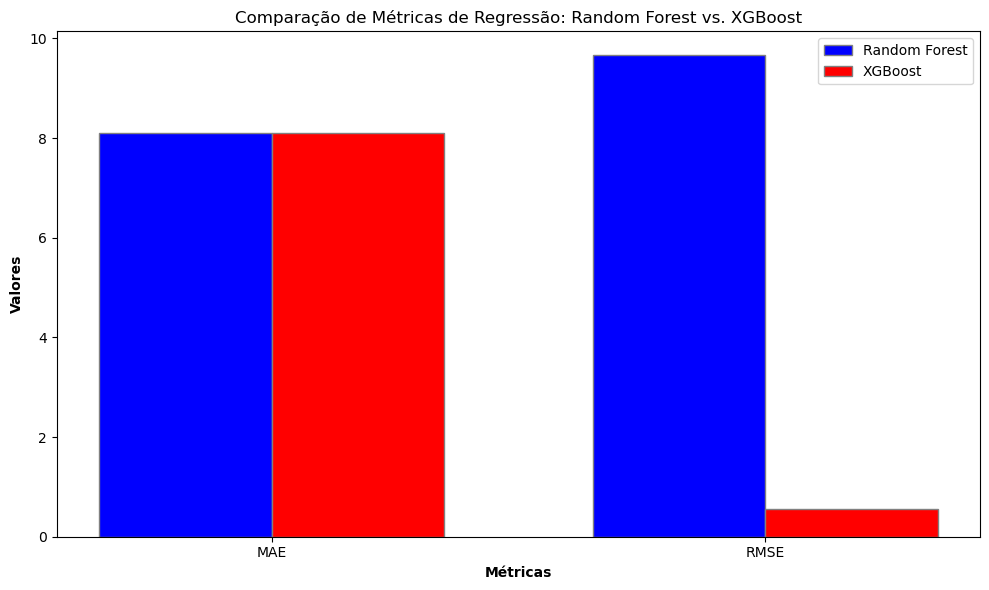

In [ ]:
"""
Objetivo: Este código cria um gráfico de barras para comparar as métricas de regressão
(MAE e RMSE) de dois modelos: Random Forest e XGBoost.


O gráfico permite comparar visualmente o desempenho dos dois modelos com base nas métricas 
MAE e RMSE. Valores menores de MAE e RMSE indicam um melhor desempenho do modelo.

"""

import matplotlib.pyplot as plt


# Define os dados das métricas para cada modelo em forma de dicionários.
RF_metrics = {
    'MAE': [8.10],
    'RMSE': [9.66],
}

XG_metrics = {
    'MAE': [8.10],
    'RMSE': [0.55],
}

# Define os nomes das métricas em uma lista
metrics = ['MAE', 'RMSE']

# Largura das barras
bar_width = 0.35

# Posições das barras no eixo x
r1 = np.arange(len(metrics))
r2 = [x + bar_width for x in r1]

# Criar o gráfico de barras, definindo cores, largura e rótulos
plt.figure(figsize=(10, 6))
plt.bar(r1, RF_metrics['MAE'] + RF_metrics['RMSE'], color='blue', width=bar_width, edgecolor='grey', label='Random Forest')
plt.bar(r2, XG_metrics['MAE'] + XG_metrics['RMSE'], color='red', width=bar_width, edgecolor='grey', label='XGBoost')

# Adicionar rótulos e título
plt.xlabel('Métricas', fontweight='bold')
plt.ylabel('Valores', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(metrics))], metrics)
plt.title('Comparação de Métricas de Regressão: Random Forest vs. XGBoost')

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()




### 6. Base de Dados (Previsões no Conjunto Teste)

In [ ]:
"""
Objetivo: Este código imprime o tamanho do conjunto de dados e os seus dados que foram utilizados para teste.

A exibição dos tamanhos dos conjuntos de dados é útil para verificar se a divisão dos dados em conjuntos de 
treinamento e teste foi realizada corretamente e para garantir que os conjuntos de teste tenham o mesmo tamanho, 
o que é importante para a avaliação do modelo.
"""

# Imprime o número de linhas do DataFrame Base_Acoes_Uber usando Base_Acoes_Uber.shape[0].
print(f"Tamanho Base_Acoes_Uber: {Base_Acoes_Uber.shape[0]}")

# 2. Imprime o número de linhas do conjunto de teste X_test usando X_test.shape[0].
print(f"Tamanho X_test: {X_test.shape[0]}")

# 3. Imprime o número de linhas do conjunto de teste y_test usando y_test.shape[0].
print(f"Tamanho y_test: {y_test.shape[0]}")

# 4. Imprime o número de elementos no array y_pred usando len(y_pred).
print(f"Tamanho y_pred: {len(y_pred)}")


Tamanho Base_Acoes_Uber: 1355
Tamanho X_test: 271
Tamanho y_test: 271
Tamanho y_pred: 271


In [ ]:
"""
Este código cria um DataFrame pandas contendo as previsões do modelo XGBoost, o preço real das ações e a 
data de negociação, e salva o DataFrame em um arquivo CSV para posterior importação no Power BI.

A criação de um DataFrame com as previsões e os valores reais facilita a análise e visualização dos resultados 
do modelo no Power BI. O arquivo CSV pode ser importado no Power BI para criar dashboards e relatórios interativos.
"""

# Cria um dicionário contendo as colunas do DataFrame
# Cria um DataFrame pandas a partir do dicionário usando pd.DataFrame().
df_previsoes = pd.DataFrame({
    "Data_Negociacao": Base_Acoes_Uber["Data_Negociacao"],
    "Preco_Real": y_test,
    "Preco_Previsto": y_pred
})

# Salva o DataFrame em um arquivo CSV chamado "previsoes_xgboost.csv" usando o método to_csv() com index=False para 
# evitar salvar o índice do DataFrame.
df_previsoes.to_csv("previsoes_xgboost.csv", index=False)

print("✅ Arquivo salvo!")


### 7. Salvar o Modelo

In [ ]:
# Biblioteca para salvar o modelo em arquivo
import pickle 


In [ ]:
# Importação a biblioteca joblib, que é usada para salvar objetos python na pasta
# Salvar o modelo em arquivo
with open('modelo_xgboost.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Modelo XGBoost salvo como 'modelo_xgboost.pkl'")

Modelo XGBoost salvo como 'modelo_xgboost.pkl'
